# Exploratory Data Analysis (EDA) for Car Advertisement Dataset

This notebook explores the `vehicles_us.csv` dataset to understand car features and pricing trends. The key steps in this analysis are:
1. Load and inspect the dataset
2. Clean and preprocess the data (handle missing values)
3. Perform univariate analysis using histograms
4. Explore bivariate relationships using scatter plots
5. Prepare insights for the Streamlit dashboard

## 1. Import Required Libraries

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [2]:
df = pd.read_csv('../vehicles_us.csv')
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

## 3. Initial Overview of Data
Let's check the structure and summary statistics.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df.describe(include='all')

price    model_year       model  condition     cylinders  \
count    51525.000000  47906.000000       51525      51525  46265.000000   
unique            NaN           NaN         100          6           NaN   
top               NaN           NaN  ford f-150  excellent           NaN   
freq              NaN           NaN        2796      24773           NaN   
mean     12132.464920   2009.750470         NaN        NaN      6.125235   
std      10040.803015      6.282065         NaN        NaN      1.660360   
min          1.000000   1908.000000         NaN        NaN      3.000000   
25%       5000.000000   2006.000000         NaN        NaN      4.000000   
50%       9000.000000   2011.000000         NaN        NaN      6.000000   
75%      16839.000000   2014.000000         NaN        NaN      8.000000   
max     375000.000000   2019.000000         NaN        NaN     12.000000   

         fuel       odometer transmission   type paint_color   is_4wd  \
count   51525   43633.000000        51525  51525       42258  25572.0   
unique      5            NaN            3     13          12      NaN   
top       gas            NaN    automatic    SUV       white      NaN   
freq    47288            NaN        46902  12405       10029      NaN   
mean      NaN  115553.461738          NaN    NaN         NaN      1.0   
std       NaN   65094.611341          NaN    NaN         NaN      0.0   
min       NaN       0.000000          NaN    NaN         NaN      1.0   
25%       NaN   70000.000000          NaN    NaN         NaN      1.0   
50%       NaN  113000.000000          NaN    NaN         NaN      1.0   
75%       NaN  155000.000000          NaN    NaN         NaN      1.0   
max       NaN  990000.000000          NaN    NaN         NaN      1.0   

       date_posted  days_listed  
count        51525  51525.00000  
unique         354          NaN  
top     2019-03-17          NaN  
freq           186          NaN  
mean           NaN     39.55476  
std            NaN     28.20427  
min            NaN      0.00000  
25%            NaN     19.00000  
50%            NaN     33.00000  
75%            NaN     53.00000  
max            NaN    271.00000

In [5]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

## 4. Data Cleaning and Missing Value Imputation
We'll now fill in missing values using logic based on other features.

In [6]:
# is_4wd: fill missing with 0 and convert to bool
df['is_4wd'] = df['is_4wd'].fillna(0).astype(bool)

# paint_color: fill missing with 'unknown'
df['paint_color'] = df['paint_color'].fillna('unknown')

# model_year: fill with median by model
df['model_year'] = df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))
df['model_year'] = df['model_year'].astype(int)

# cylinders: fill with median by type
df['cylinders'] = df.groupby('type')['cylinders'].transform(lambda x: x.fillna(x.median()))
df['cylinders'] = df['cylinders'].astype(int)

# odometer: fill with median by model_year
df['odometer'] = df.groupby('model_year')['odometer'].transform(lambda x: x.fillna(x.median()))

# create manufacturer column
df['manufacturer'] = df['model'].apply(lambda x: x.split()[0])

C:\Users\patel\vehicle-sales\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## 5. Univariate Analysis
Let's look at the distribution of individual features using histograms.

In [7]:
px.histogram(df, x='price', nbins=50, title='Price Distribution')

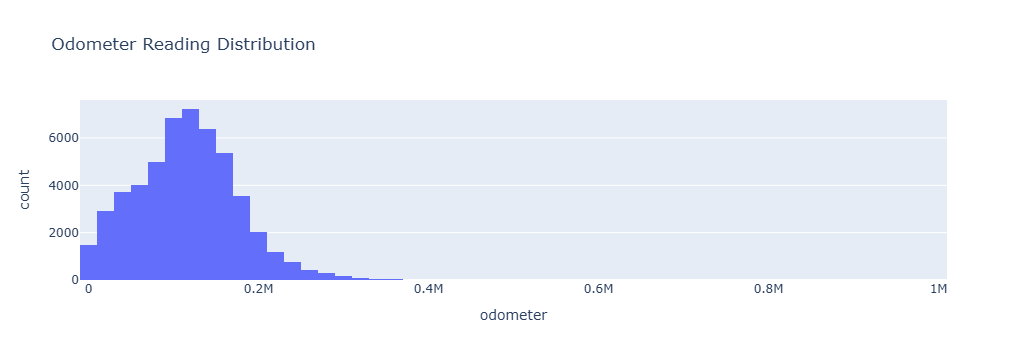

In [8]:
px.histogram(df, x='odometer', nbins=50, title='Odometer Reading Distribution')

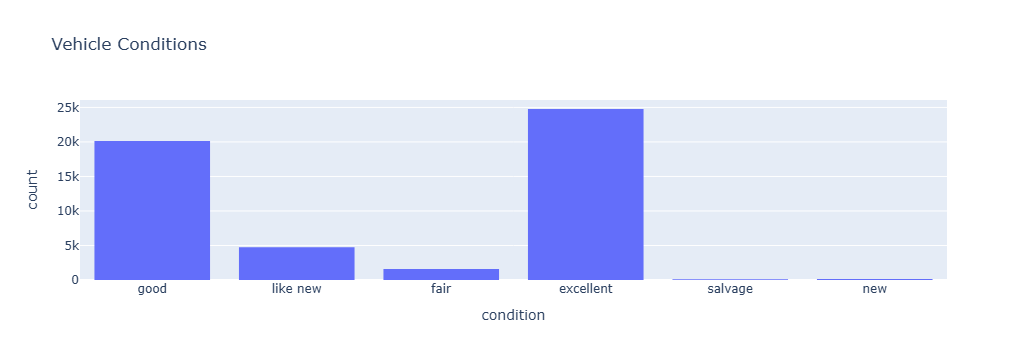

In [9]:
px.histogram(df, x='condition', title='Vehicle Conditions')

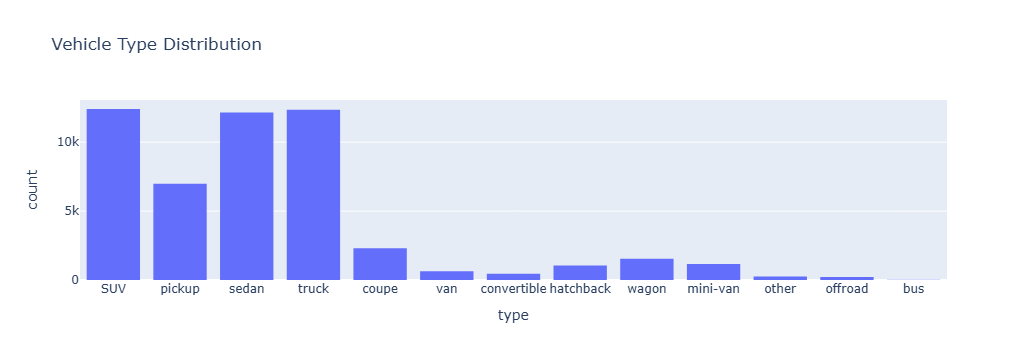

In [10]:
px.histogram(df, x='type', title='Vehicle Type Distribution')

## 6. Bivariate Analysis
Now, let's explore relationships between numeric and categorical variables.

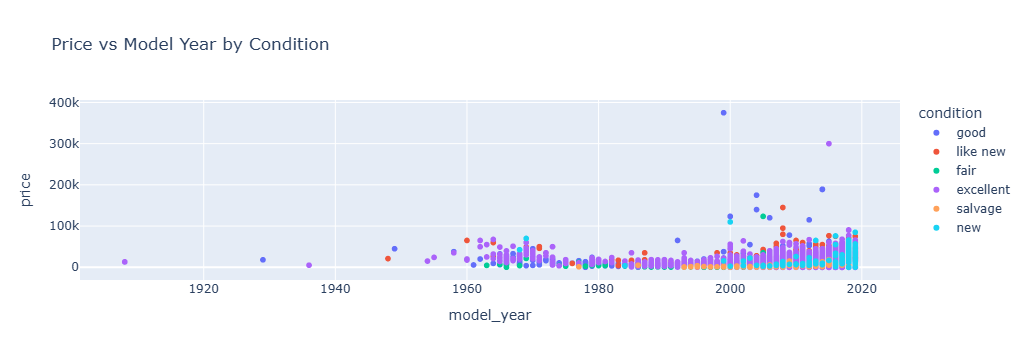

In [11]:
px.scatter(df, x='model_year', y='price', color='condition', title='Price vs Model Year by Condition')

In [12]:
px.scatter(df, x='odometer', y='price', color='condition', title='Price vs Odometer by Condition')

## 7. Category Comparison
Compare how vehicle types vary across manufacturers.

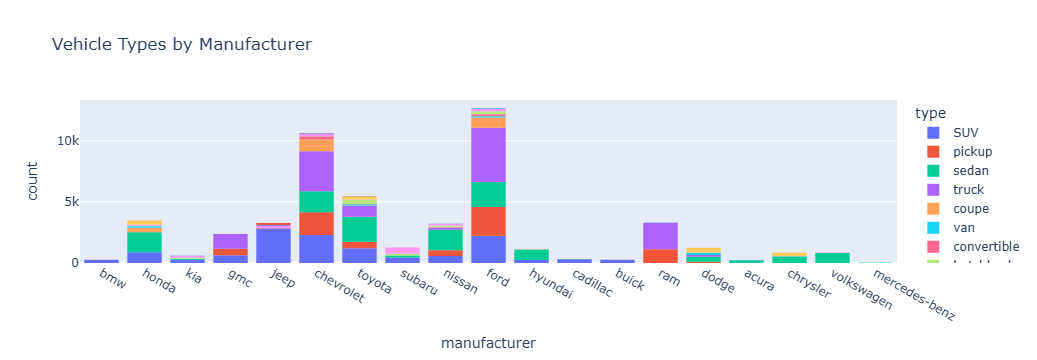

In [13]:
px.histogram(df, x='manufacturer', color='type', title='Vehicle Types by Manufacturer')